### Classification with neural nets
In this notebook, we'll create a 2 class dataset of points and try to predict the classes with a few types of neural nets.

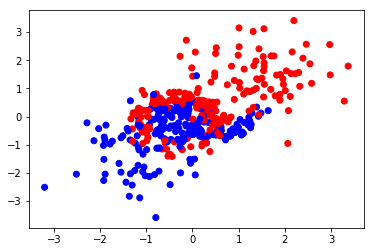

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.metrics import roc_auc_score

np.random.seed(600)
h = .01  # step size in the mesh

#Our dastardly dataset!
X1, y1 = make_moons(n_samples=250, noise=.15)
X2, y2 = make_circles(n_samples=250, noise=0.2, random_state=1, factor=0.6)
X3, y3 = make_blobs(n_samples=250, centers=[[2, 2], [-1, -1]])

X = np.concatenate((X1,X2,X3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)

# mesh grid plotting - note that y_min, y_max, yy correspond to coordinates and NOT the target
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

plt.show()

In [2]:
def plotHelper(X_test,y_test,xx,yy,model,title):
    test_preds = model.predict_proba(X_test)
    score =roc_auc_score(y_test,test_preds)
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, s=40)

    plt.title(title)
    plt.text(xx.max() - .3, yy.min() + .3, 'AUC='+('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.regularizers import l2

model = Sequential()
model.add(Dense(input_dim=2, units=1, kernel_initializer="normal"))
model.add(Activation("sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

# print initial weights
weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
'neural net initialized with weights w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals())

C:\Users\Hamburg\Anaconda3\envs\tensorflow2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'neural net initialized with weights w0: 0.01, w1: 0.00'

In [4]:
model.fit(X_train,
          np.array(y_train, ndmin=2).T,
          epochs=200,
          verbose=0)

# print trained weights
weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
'neural net weights after training w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals())


'neural net weights after training w0: -0.12, w1: -0.11'

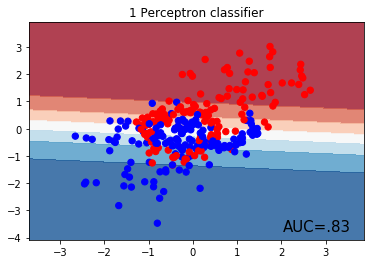

In [5]:
plotHelper(X_test,y_test,xx,yy,model,title='1 Perceptron classifier')

In [6]:
model = Sequential()
model.add(Dense(4, input_dim=2, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

model.fit(X_train,
          np.array(y_train, ndmin=2).T,
          epochs=1000,
          verbose=0);

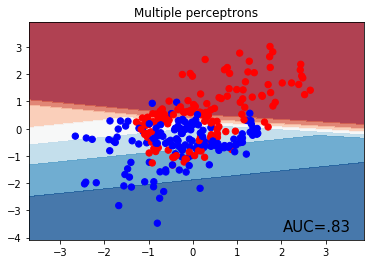

In [7]:
plotHelper(X_test,y_test,xx,yy,model,title='Multiple perceptrons')

In [8]:
model = Sequential()
model.add(Dense(4, input_dim=2, kernel_initializer='uniform', activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

model.fit(X_train,
          np.array(y_train, ndmin=2).T,
          epochs=1000,
          verbose=0);

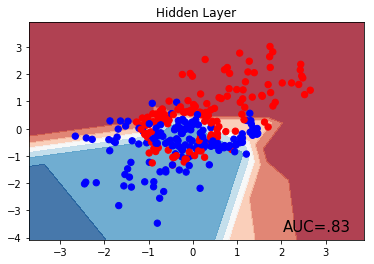

In [9]:
plotHelper(X_test,y_test,xx,yy,model,title='Hidden Layer')

In [10]:
model = Sequential()
model.add(Dense(16, input_dim=2, kernel_initializer='uniform', activation='relu'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

model.fit(X_train,
          np.array(y_train, ndmin=2).T,
          epochs=1000,
          verbose=0);

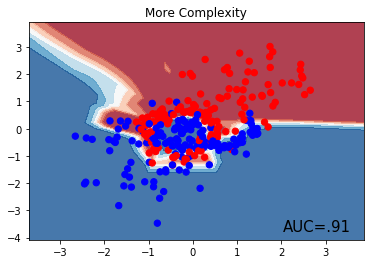

In [11]:
plotHelper(X_test,y_test,xx,yy,model,title='More Complexity')

#### Exercise 1
Implement dropout (https://keras.io/layers/core/#dropout) in your neural net model

In [12]:
model = Sequential()
model.add(Dense(16, input_dim=2, kernel_initializer='uniform', activation='relu'))
model.add(Dense(32, activation='relu'))
Dropout(.3, noise_shape=None, seed=42)
model.add(Dense(32, activation='relu'))
Dropout(.5, noise_shape=None, seed=42)
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

model.fit(X_train,
          np.array(y_train, ndmin=2).T,
          epochs=1000,
          verbose=0);

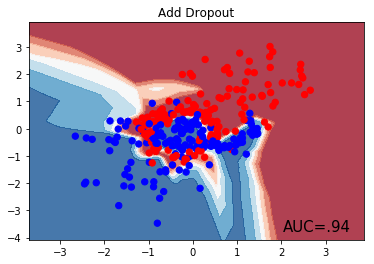

In [13]:
plotHelper(X_test,y_test,xx,yy,model,title='Add Dropout')

#### Exercise 2
Implement L2 regularization (https://keras.io/regularizers/) in your model and compare the results

In [14]:
model = Sequential()
model.add(Dense(16, input_dim=2, kernel_initializer='uniform', activation='relu'))
model.add(Dense(32, activation='relu',
               kernel_regularizer=l2(0.01)))
Dropout(.3, noise_shape=None, seed=42)
model.add(Dense(32, activation='relu', 
               kernel_regularizer=l2(0.10)))
Dropout(.5, noise_shape=None, seed=42)
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

model.fit(X_train,
          np.array(y_train, ndmin=2).T,
          epochs=1000,
          verbose=0);


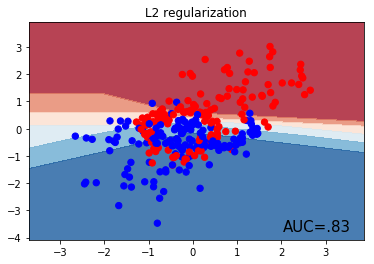

In [15]:
plotHelper(X_test,y_test,xx,yy,model,title='L2 regularization')

#### Exercise 3  Now go build your own!

Here is the Keras model building documentation: http://keras.io/models/

Here's a resource for some rough 'rules of thumb' for neural nets: ftp://ftp.sas.com/pub/neural/FAQ3.html#A_hu

In [ ]:
plotHelper(X_test,y_test,xx,yy,model,title='My awesome model')